<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/ADS_Weekly_Task_4_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Do not forget to make a copy before you start!

## **<font color='crimson'> Deadline: 2023/05/24 23:59:00 </font>**



## How to assign your weekly task to Google classroom

- **Recommended:**

  -  Once you copy the task to your own driver, the task colab file is in the [Colab Notebook] folder in you google driver.
  -  Just upload the task **ipynb** file to the Google Classroom.

  - Do not forget to save your colab file before uploading.


- Another way:


- 1. Download the colab file using **'File - download - .ipynb'** in the menu bar.

- 2. You will get a ipynb file in your local laptop, then upload the file to the Google Classroom.



###<font color='crimson'>[Task 1]Read tsv,txt files </font>

Read the following files correctly.

https://raw.githubusercontent.com/dgod1028/Research/main/data/df.tsv

https://raw.githubusercontent.com/dgod1028/Research/main/data/df.txt

- the columns should be seperated correctly.

- The original file has two index columns. Delete the first column (start from 0 to 525), and set the second column (1 ~ 526) as index for each file.


In [ ]:
# Task 1
import pandas as pd
df_tsv = pd.read_csv('https://raw.githubusercontent.com/dgod1028/Research/main/data/df.tsv', sep='\t')

df_tsv = df_tsv.iloc[:, 1:].set_index(df_tsv.columns[1])
df_tsv.head(5)

df_txt = pd.read_table('https://raw.githubusercontent.com/dgod1028/Research/main/data/df.txt', sep='|')
df_txt = df_txt.iloc[:, 1:].set_index(df_txt.columns[1])
df_txt.head(5)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
2,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
3,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
4,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
5,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


###<font color='crimson'>[Task 2] Operation of DataFrame </font>

1. Set random seed as 0 using numpy first.

1. Make 50 **integer** samples from 0 to 10 (include 10), and reshape the vector to a matrix with 10 rows and 5 columns. And convert the matrix to a pandas DataFrame.

1. Rename the index to "day 1", "day 2", ... "day 10", and rename the columns to "product 1", "product 2", ... "product 5".

1. We assume the values are the sales of the product for a specific day. (e.g., value in row 2, column 2 means the sales for the product 2 for day 2). Extract only the days with the total sales of all the products higher than 20, and save to a variable `df2`.

<font color='crimson'>★Challenge★</font>

5. From `df2`, extract only the days satisfies all the following conditions - sales of product 1 smaller than 5, and sales of product 4 bigger than 5.

In [ ]:
# Task 2
import numpy as np

np.random.seed(0)


samples = np.random.randint(0, 11, size=50)

matrix = samples.reshape(10, 5)
df = pd.DataFrame(matrix)


df.index = ["day {}".format(i+1) for i in range(10)]
df.columns = ["product {}".format(i+1) for i in range(5)]


df2 = df[df.sum(axis=1) > 20]
df3 = df2[(df2['product 1'] < 5) & (df2['product 4'] > 5) ]
df3

,product 1,product 2,product 3,product 4,product 5
day 4,1,6,7,7,8
day 5,1,5,9,8,9


###<font color='crimson'>[Task 3] Forecasting </font>

Here is a simulation data generated by me, '**Sales of ice cream**'.

https://raw.githubusercontent.com/dgod1028/Research/main/data/ice_cream.csv

**Variable explanation**:

- Temperature: mean temperature of the day.

- Rainy(Dummy): If rainy, then 1, otherwise 0.

- Sales: sales of ice cream for the day.

Do the following tasks.

1. Read the data.

1. visualize the 3 variables (X axis: day, Y axis: values for each column) using `plt.plot()` in one figure.

1. Set sales as the target variable **y**, others as independent variables **X**. Make a simple linear regression.

1. Output the intercept and coefficients of the independent variables.


5. The weather forecast provided weather information for the next two days. Based on this weather information, make the prediction of ice cream sales for these two days!

- day1: Temperature: 20.5, Rainy:0
- day2: Temperature: 9.1, Rainy:1

<font color='crimson'>★Challenge★</font>

6. We have 100 samples in this dataset. Randomly select 80 samples (rows), and make a regression with only these 80 samples. Then make a prediction using the remained 20 samples (You should only use temperature and rainy columns when predicting). Assuming

- `preds` is the predicted sales for the 20 days,

- `y_test` is the real sales for the 20 days,

then make a comparison of `preds` and `y_test` by visualizing the real data y (the sales from 20 samples), and the predicted sales (the predicted sales for 20 samples) using `plt.plot()` or `plt.scatter()`.

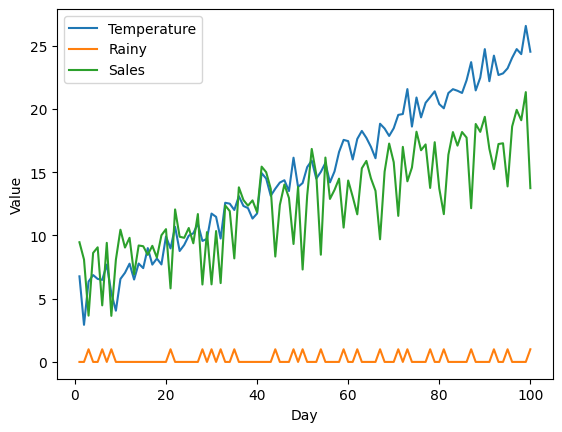

In [ ]:
# Task 3
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/dgod1028/Research/main/data/ice_cream.csv", sep=",")
#df.head(5)
#df.info()
df['Day'] = [i+1 for i in range(100)]
df.set_index(df['Day'])
df.head(5)
plt.plot(df['Day'], df['Temperature'], label='Temperature')
plt.plot(df['Day'], df['Rainy(Dummy)'], label='Rainy')
plt.plot(df['Day'], df['Sales'], label='Sales')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.show()

Intercept: 5.122294001157587
Coefficients: [ 0.57711746 -4.79351696]
Predictions for the next two days:
Day 1: 16.95
Day 2: 5.58


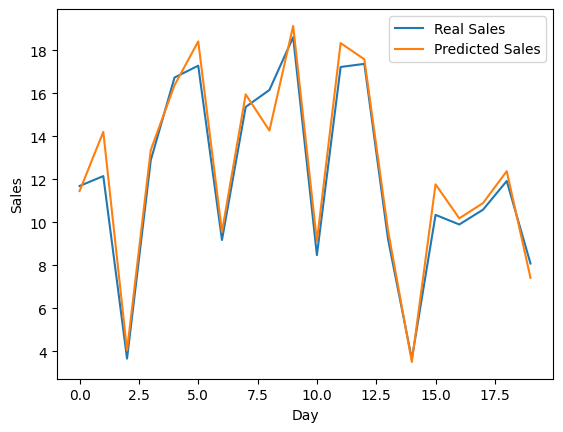

In [ ]:
from sklearn.linear_model import LinearRegression
X = df[['Temperature', 'Rainy(Dummy)']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)

intercept = model.intercept_
coefficients = model.coef_

print('Intercept:', intercept)
print('Coefficients:', coefficients)


次の2日の予測:
Day 1: 17.06
Day 2: 5.65


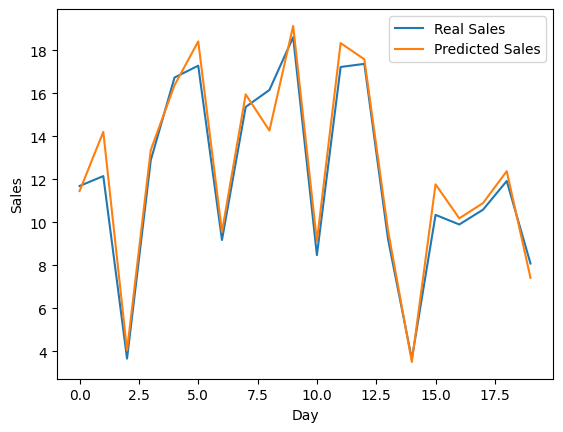

In [ ]:

new_data = pd.DataFrame({'Temperature': [20.5, 9.1], 'Rainy(Dummy)': [0, 1]})
predictions = model.predict(new_data)

print('次の2日の予測:')
for i in range(len(predictions)):
    print('Day {}: {:.2f}'.format(i+1, predictions[i]))


from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, train_size=80, random_state=0)


X_train = train_df[['Temperature', 'Rainy(Dummy)']]
y_train = train_df['Sales']

model = LinearRegression()
model.fit(X_train, y_train)


X_test = test_df[['Temperature', 'Rainy(Dummy)']]
y_test = test_df['Sales']

preds = model.predict(X_test)


plt.plot(range(len(y_test)), y_test, label='Real Sales')
plt.plot(range(len(preds)), preds, label='Predicted Sales')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.legend()
plt.show()